In [1]:
# import a custom plotting library
import some_plotters as plotter

# import autograd functionality
import autograd.numpy as np

# import path to datasets
datapath = 'datasets/'

# # this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
# from matplotlib import rcParams
# rcParams['figure.autolayout'] = True
# %matplotlib notebook

# autoreload function - so if anything behind the scenes is changeed those changes
# are reflected in the notebook without having to restart the kernel
%load_ext autoreload
%autoreload 2

#### <span style="color:#a50e3e;">Exercise 1: </span>  Train an unregularized PID controller for the cruise control problem

In this exercise you will tune the parameters of a PID controller automatically so that the trained Imitation Model (that you trained in homework 1 exercise 1) matches the example set point sequence shown below relatively closely.  

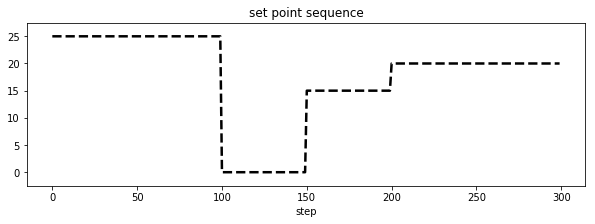

In [2]:
# load in set point sequence
csvname = 'datasets/cruise_setpoints.csv'
set_points = np.loadtxt(csvname,delimiter = ',')[np.newaxis,:]

# plot set point sequence
plotter.plot_setpoints(set_points)

Implement a `Pythonic` version of the PID controller Least Squares cost function discussed in the [course notes](https://jermwatt.github.io/control-notes/presentations/pid_control/pid_control_part_1.slides.html#/).  You should be able to learn an optimal action / state sequence pair so that your system model responds fairly well to the input set point sequence.  The image below shows the results of an action/state sequence pair learned by a fully tuned PID controller.  The top panel shows the set point sequence in dashed black, with the state sequence defined by the controller in blue.  The bottom panel shows the corresponding action sequence defined by the controller.

<figure>
<p>
<img src= 'images/pid_result.png' width="150%" height="150%" alt=""/>
</p>
</figure>

A few notes: 

- You will need a fully trained Imitation Model - which you created in Exercise 1 of Homework 1 - for this exercise.  This model - for example - clips actions between $\left[-50,100\right]$.


- Even though a PID controller is technically a Recurrent Network (which can be slow to train), here we only deal with a fairly small dataset of set points and there only 4 parameters to tune - so you can apply the simplest kind of first order algorithm to properly minimize the controller cost (e.g., a full batch gradient descent optimizer).  However I've found that simpler approaches - like the zero-order coordinate descent algorithm discussed in the `homework_2_helper_functions.ipynb` notebook.


- For this exercise you need not worry about cross-validating, simply tune it as best as you can.  The result above was achieved with less than 50 steps of zero order coordinate descent.


- Examining the actions (the amount we depress the pedtal), notice how uncomfortable the driving experience above would be when transitioning between speed levels.  This would be crazy.  If we really wanted this controller to perform well we would need to *regularize* our Least Squares cost to avoid this kind of crazy behavior.  But you don't need to worry about that here.